# Clustering Whisky Distillers
In this notebook, I try to group 86 distillers of single malt Scotch Whisky according to their taste profile.

For this task, the method I will use is called K-Means clustering which is an unsupervised machine learning algorithm well suited for such a task.

The application for this project will recommend whisky to you depending on your taste preference or by recommending similar whiskies to the ones you have enjoyed.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv('data/whisky.csv', index_col='RowID')
df.head()

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
RowID,,,,,,,,,,,,,,,,
1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 1 to 86
Data columns (total 16 columns):
Distillery    86 non-null object
Body          86 non-null int64
Sweetness     86 non-null int64
Smoky         86 non-null int64
Medicinal     86 non-null int64
Tobacco       86 non-null int64
Honey         86 non-null int64
Spicy         86 non-null int64
Winey         86 non-null int64
Nutty         86 non-null int64
Malty         86 non-null int64
Fruity        86 non-null int64
Floral        86 non-null int64
Postcode      86 non-null object
Latitude      86 non-null int64
Longitude     86 non-null int64
dtypes: int64(14), object(2)
memory usage: 11.4+ KB


There's a total of 86 whisky distillers in the dataset. None of them have any missing values.

Only the Distillery and Postcode columns are non-numeric, and the rest are integer data types.

In [4]:
df.describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01
mean,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,287247.162791,8.026597e+05
std,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,67889.046814,8.802422e+04
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126680.000000,5.542600e+05
25%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,265672.500000,7.556975e+05
50%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,319515.000000,8.398850e+05
75%,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,328630.000000,8.507700e+05
max,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,381020.000000,1.009260e+06


All the numerical columns (except for geographical mapping columns) seems to be categorical as they are integers which range from 1 to 4. This means that we are dealing with categorical data for the most part here.

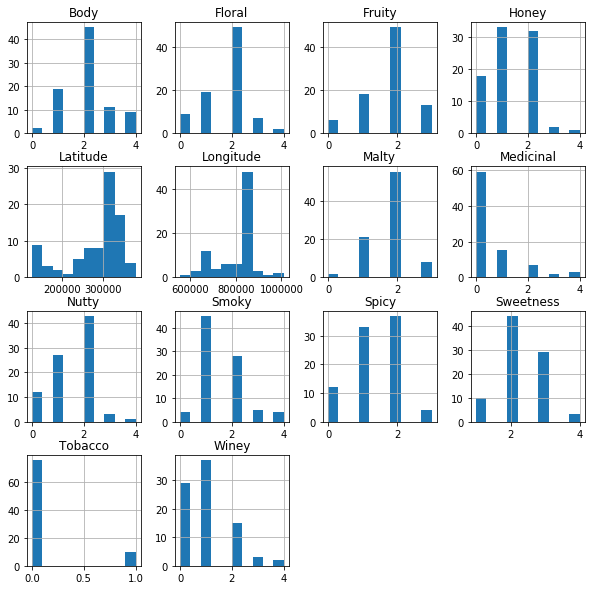

In [5]:
df.hist(figsize=(10,10))
plt.show()

Looking at the data , it seems like it is mostly made up of categorical features. The only continous features are geo location features.

All the features seem to have a somewhat normal or binomial distribution, with Tobacco having to be heavily skewed to the right. There are about 10 samples there, so it is by no means an outlier and I will not drop any of the samples.

## Drop Columns
I will drop columns which I will not use to model such as the Postcode, Distillery , body and GPS co-ordinates. Since we are grouping by taste profiles and Body is not a flavour, I will have to drop it.

In [6]:
df= df.drop(['Postcode', 'Distillery', 'Body', 'Latitude', 'Longitude'], axis=1)


In [7]:
df.head()

,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
RowID,,,,,,,,,,,
1,2,2,0,0,2,1,2,2,2,2,2
2,3,1,0,0,4,3,2,2,3,3,2
3,3,2,0,0,2,0,0,2,2,3,2
4,1,4,4,0,0,2,0,1,2,1,0
5,2,2,0,0,1,1,1,2,3,1,1


## Dimensionality reduction
Since this dataset has a lot of features, visualizing the clusters is hard. So glady, the dataset can be reduced down to only the important components without losing much quality on the data. So I reduce it down to 2 dimension.

In [8]:
from sklearn.decomposition import KernelPCA
np.random.seed(42)
rbf_pca= KernelPCA(n_components=2, kernel='rbf')
X_reduced= rbf_pca.fit_transform(df)


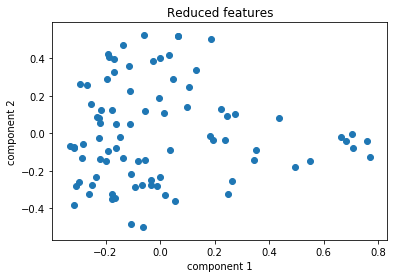

In [9]:
#feature a and b
x=X_reduced[:,0]
y=X_reduced[:,1]

plt.scatter(x, y)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Reduced features')
plt.show()

Above, I have successfully reduced the number of dimensions in the data from 11 flavours to just 2 components. This allows for easy visualizations on a scatter plot as seen above. The downside is that the 2 components are not interpreable as they compresse all the other features.

# Clustering
I will then apply k-means clustering to group the whisky distillers into their respective clusters.
But firstly I need to figure out how many clusters are best to use. To do that, I will use the elbow method which proves to be an easy to interpret graph.

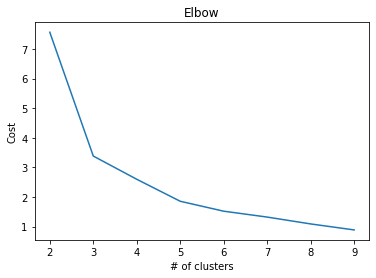

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


sil_scores=[]
costs=[]
for clusters in range(2,10):
    km= KMeans(n_clusters=clusters, random_state=42)
    km.fit(X_reduced)
    
    #loss
    costs.append(km.inertia_)
    #predict cluster
    labels= km.predict(X_reduced)
    
    #silhouette score
    sil_score= silhouette_score(X_reduced, labels)   
    sil_scores.append(sil_score)
    
plt.plot(range(2,10), costs)
plt.title('Elbow')
plt.xlabel('# of clusters')
plt.ylabel('Cost')
plt.show()
    

From the elbow plot seen above, it is clear that 3 would be a great number of cluster to use. 5 also looks interesting, so I will perform a Silhouette test.

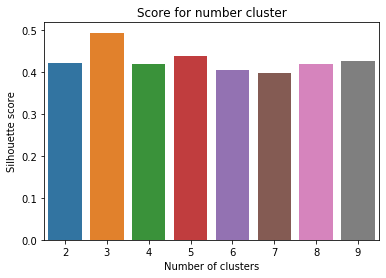

In [11]:
sns.barplot(x=list(range(2,10)), y=sil_scores)
plt.title('Score for number cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Looking at the silhouette scores above for clusters ranging from 2 to 9, it is evident that 3 clusters are more likely to give us a better results as we see 3 clusters have the highest silhouette score.

## Final Model
Now that I have figured out that 3 clusters would be best for the data, I use it to cluster the whisky distillers at last.

In [12]:
km= KMeans(n_clusters=3, random_state=42)
y_preds= km.fit_predict(X_reduced)

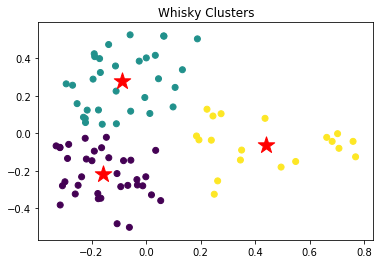

In [13]:
plt.scatter(x, y, c=y_preds, cmap='viridis' )
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='*')
#plt.legend(loc='upper left')
plt.title('Whisky Clusters')
plt.show()

Looking at the scatterplot above, it is easy to see the various clusters whisky distillers are separable by their tasting profiles.

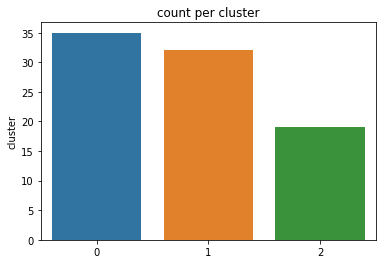

In [14]:
df['cluster']= y_preds
clusters= df.cluster.value_counts()
sns.barplot(x=clusters.index, y=clusters)
plt.title('count per cluster')
plt.show()

Most distillers belong to the cluster 0 followed by 1 and 2.

## Do tasting profiles differ by location?
### Postcode to GPS co-ordinates
I use a library called pgeocode in order to get the GPS co-ordinates of each Distiller from the given post codes. The latitude and longitude given in the data are not in the standard format we can use to plot on a map, so the code below gets it for us.

In [15]:
import pgeocode
nomi=pgeocode.Nominatim('GB')
nomi.query_postal_code('PH15 2EB')

postal_code                                                    PH15
country code                                                     GB
place_name        Innerwick, Dull, Fortingall, Fearnan, Weem, Re...
state_name                                                 Scotland
state_code                                                      SCT
county_name                                       Perth and Kinross
county_code                                                     NaN
community_name                                                  NaN
community_code                                                  NaN
latitude                                                       56.6
longitude                                                  -4.03139
accuracy                                                          4
Name: 0, dtype: object

In [16]:
df1= pd.read_csv('data/whisky.csv', index_col='RowID')
#query postal code returns a series. The 9th and 10th index contain the latitude and longitude respectively.
df1['Latitude']= df1.Postcode.apply(lambda x: nomi.query_postal_code(x)[9])
df1['Longitude']= df1.Postcode.apply(lambda x: nomi.query_postal_code(x)[10])


In [17]:
df1['cluster']= y_preds
df1.dropna(inplace=True)

In [18]:
#cluster categories
cats= df1.cluster.unique()
cats

array([1, 2, 0])

In [19]:
import folium
from folium.plugins import MarkerCluster

m= folium.Map(location=[56.6,-4.03139], tiles='OpenStreetMap', zoom_start=6.5)

colors=['orange', 'purple', 'lightgreen']
for idx,cat in enumerate(cats):
    for lat, long in zip(df1[df1.cluster==cat].Latitude, df1.Longitude):
        folium.Marker(location = [lat, long], icon=folium.Icon(color=colors[idx]),
                                                              popup=f'cluster: {cat}').add_to(m)

m

By looking at the map, it is evident that most Distillers are located close to water sources such as rivers, lakes and the ocean. This is most probably because water is the key ingredient alongside barley and yeast. But at this point, I cannot argue beyond reasonable doubt how geography plays a role in the taste of whisky.

This may certainly be a research topic on its own, but as seen <a href='https://www.whisky-news.com/images/role_of_water/The%20role%20of%20water%20composition%20on%20whisky%20flavours.htm'>here</a>, the taste of whisky isn't so much determined by the water source as well.

Therefore I reject the assumption that  the taste profile of whisky is subject to where it is made or the water source.

## How do the 3 clusters differ?

In [20]:
#Populate the 3 lists from the dataframe
cluster0, cluster1, cluster2=[],[],[]
cluster_list= [cluster0, cluster1, cluster2]
for idx, each in enumerate(cluster_list):
    cluster_list[idx].append(df1.Distillery[df1.cluster==idx].values[:])

#change them into lists instead of nested lists with length 1 
cluster0, cluster1, cluster2= list(cluster0[0]) ,list(cluster1[0]), list(cluster2[0])

In [21]:
#dataframe with the cluster as the index
cluster_df=df1.groupby('cluster').mean()
cluster_df.drop(['Latitude', 'Longitude', 'Body'], axis=1, inplace=True)
labels=np.array(cluster_df.columns)


In order to fairly plot the values on the same scale, I normalize them.

In [22]:
#normalize
def normalize(data):
    for each in data.columns:
        mean= data[each].mean()
        standard_deviation= data[each].std()
        data[each]= (data[each]-mean)/standard_deviation

normalize(cluster_df)

/home/masai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


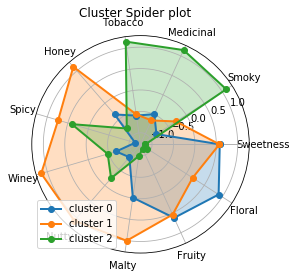

In [23]:
fig=plt.figure()
for idx in range(3):
    stats=cluster_df.loc[idx,labels].values
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2, label=f"cluster {idx}")
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.grid(True)
    plt.subplots_adjust(hspace=0.8)
    plt.suptitle('Cluster Spider plot', fontsize=12)
    plt.legend(loc=3)

## Feature Importance
The most important features for separating the three clusters can be extracted by just analyzing the spider plot above. It is clear that the important features are;
* Winey
* Medicinal
* Honey
* Floral

## Recommendation
* `cluster 0` is mostly Floral, sweet and fruity. It is best for people who enjoy the likes of Glenfiddich. If you are someone who is into fruity wine, these types of whyiskys may be the best.
* `cluter 1` is sweet, spicy, nutty, malty and honey flavour. Contains Whiskys such as Glenlivet. Great choice for many due to its sweet and honey taste.
* `cluster 2` is Smoky, medicinal and a dash of tobacco flavour. These whiskys have a mostly strong taste such as GlenGarioch. These types of whiskys may not be a favourite for first time drinkers of whisky as they are very strong.

If you have had whisky before, it may be great to look at some of the options we have in our analysis and choose other bottles in the same cluster.

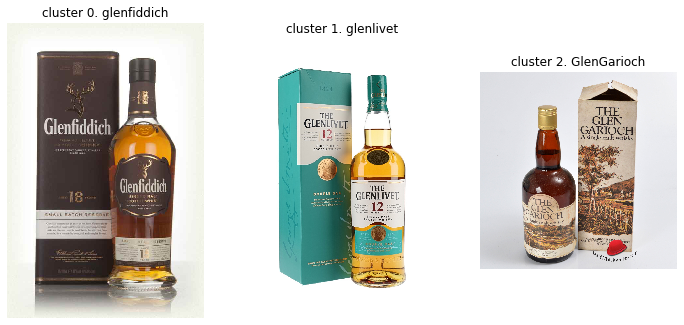

In [24]:
from PIL import Image

pics= ['glenfiddich.jpg', 'glenlivet.jpg', 'GlenGarioch.jpg']
plt.figure(figsize=(12,12))
for idx, image in enumerate(pics, 1):
    plt.subplot(1,3, idx)
    im= Image.open('images/'+image)
    plt.imshow(im)
    plt.axis('off')
    plt.title(f"cluster {idx-1}. {image.split('.')[0]}")

Whisky fanatics can easily tell apart the various tastes clusters by seeing some of their favourite bottles above.

In [25]:
from itertools import zip_longest
#concat the lists regardless of their lengths
table_entries= zip_longest(cluster0, cluster1, cluster2)

In [26]:
from IPython.display import HTML, display

display(HTML(
    """
        <table style='width:50%'><tr>
        <th>cluster0</th>
        <th>cluster1</th>
        <th>cluster2</th>
        </tr>
    """
   '<tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(entry) if entry else '' for entry in row)) for row in table_entries)
       )
))

cluster0,cluster1,cluster2
ArranIsleOf,Aberfeldy,Ardbeg
Auchentoshan,Aberlour,Balblair
Aultmore,Ardmore,Bowmore
Benriach,Auchroisk,Bruichladdich
Bladnoch,Balmenach,Caol Ila
Bunnahabhain,Belvenie,Clynelish
Cardhu,BenNevis,GlenGarioch
Craigganmore,Benrinnes,GlenScotia
Dalwhinnie,Benromach,Highland Park
Dufftown,BlairAthol,Isle of Jura


Looking at the table above, you see all the whisky distillers in their respective clusters. If you have had any of the above whiskies and liked it, go ahead and try out some of the other similar bottles.

# Conclusion
Having used the K-means algorithm to cluster the various types of whisky together, it is great to see how this model may be used to recommend whisky to people according to their taste preferences.

As we have a lot of flavours, I needed to use Principal Component Analysis in order to be able to visualize the clusters in 2 dimensions. Luckily, they are separable even in a lower dimension which gives me the confidence that this project was a success.

In order to get the best number of clusters I used both the elbow method as well as the **silhouette method** which both confirm that 3 is the magic number of clusters here.

Thereafter, the spider plot showed how the 3 clusters differ according to their score on various flavours. I then proceeded to recommend which one of the 3 clusters is best for what type of person followed by a table showing all the Distillers allowing you to pick a bottle matching your taste profile or a bottle similar to one you have had before.

The **most important features** I have found to seperate the clusters are Winey, Medicinal, Honey and Floral.

This project is a great example of how the power of data science can learn really complex concepts such as taste, even in cases where we have no labels. Unsupervised learning has it's place in the whole machine learning ecosystem.